### Nama: Rofif Fairuz Hawary

### NIM : 18220090

# Library Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style('darkgrid')

# Data Collection

In [2]:
df_bank = pd.read_csv("banking.csv")
df_fint = pd.read_csv("fintech.csv")

#### Check up dataframe

In [3]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   responden              2095 non-null   int64 
 1   jenis_kelamin          2095 non-null   object
 2   usia                   2095 non-null   object
 3   pendidikan             2095 non-null   object
 4   penghasilan            2095 non-null   object
 5   aktivitas_meningkat_1  999 non-null    object
 6   aktivitas_meningkat_2  1445 non-null   object
 7   aktivitas_meningkat_3  1426 non-null   object
 8   aktivitas_meningkat_4  1510 non-null   object
 9   aktivitas_meningkat_5  100 non-null    object
 10  memiliki_akun_bank?    2095 non-null   object
 11  bank_pilihan_1         535 non-null    object
 12  bank_pilihan_2         931 non-null    object
 13  bank_pilihan_3         588 non-null    object
 14  bank_pilihan_4         623 non-null    object
 15  bank_pilihan_5       

In [4]:
df_fint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   responden                     2095 non-null   int64 
 1   jenis_kelamin                 2095 non-null   object
 2   usia                          2095 non-null   object
 3   pendidikan                    2095 non-null   object
 4   penghasilan                   2095 non-null   object
 5   aktivitas_meningkat_1         999 non-null    object
 6   aktivitas_meningkat_2         1445 non-null   object
 7   aktivitas_meningkat_3         1426 non-null   object
 8   aktivitas_meningkat_4         1510 non-null   object
 9   aktivitas_meningkat_5         100 non-null    object
 10  menggunakan_fintech_lending?  2095 non-null   object
 11  fintech_pilihan_1             44 non-null     object
 12  fintech_pilihan_2             12 non-null     object
 13  fintech_pilihan_3 

# Data Processing

### Demografi Responden

#### Proporsi dan Frekuensi Gender Responden

In [5]:
# karena 5 dataframe masih dalam 1 response form, responden di tiap dataframe sama
# maka gunakan salah satu dataframe saja untuk melakukan plot responden


df = pd.DataFrame(df_bank["jenis_kelamin"].value_counts()).reset_index()
li = []
for i in range(len(df)):
    li.insert(i ,df["jenis_kelamin"][i]/len(df_bank))
df["Proporsi"] = li
df.columns = ["Gender", "Frekuensi", "Proporsi"]

# memebersihkan data yang "tidak menjawab"
found = False
i = 0
while (found == False):
    if df["Gender"][i] == "tidak menjawab":
        found = True
    else:
        i += 1
df = df.drop(labels=[i], axis=0)

n=0
for i in range(len(df)):
   n += df["Frekuensi"][i] 
for i in range(len(df)):
    df.at[i, "Proporsi"] = df["Frekuensi"][i]/n

Tabel Frekuensi Gender Responden

In [6]:
df

,Gender,Frekuensi,Proporsi
0,Laki – laki,1049,0.504327
1,Perempuan,1031,0.495673


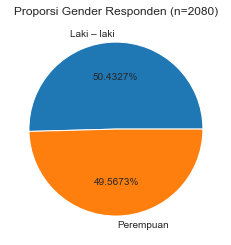

In [7]:
plt.pie(df["Proporsi"], labels = list(df["Gender"]), autopct = "%.4f%%")
plt.title("Proporsi Gender Responden (n={})".format(n))
plt.show()

#### Proporsi dan Frekuensi Usia Responden

In [8]:
df = pd.DataFrame(df_bank["usia"].value_counts()).reset_index()
li = []
for i in range(len(df)):
    li.insert(i ,df["usia"][i]/len(df_bank))
df["Proporsi"] = li
df.columns = ["Usia", "Frekuensi", "Proporsi"]

# memebersihkan data yang "tidak menjawab"
found = False
i = 0
while (found == False):
    if df["Usia"][i] == "tidak menjawab":
        found = True
    else:
        i += 1
df = df.drop(labels=[i], axis=0)

n=0
for i in range(len(df)):
   n += df["Frekuensi"][i] 
for i in range(len(df)):
    df.at[i, "Proporsi"] = df["Frekuensi"][i]/n

Tabel Frekuensi Usia Responden

In [9]:
df

,Usia,Frekuensi,Proporsi
0,15-20 tahun,1489,0.713806
1,21-30 tahun,288,0.138063
2,41-50 tahun,143,0.068552
3,>50 tahun,84,0.040268
4,31-40 tahun,70,0.033557
5,< 15 tahun,12,0.005753


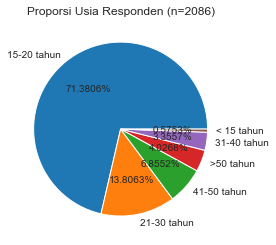

In [10]:
plt.pie(df["Proporsi"], labels = list(df["Usia"]), autopct = "%.4f%%")
plt.title("Proporsi Usia Responden (n={})".format(n))
plt.show()

#### Proporsi dan Frekuensi Pendidikan Responden

In [11]:
df = pd.DataFrame(df_bank["pendidikan"].value_counts()).reset_index()
li = []
for i in range(len(df)):
    li.insert(i ,df["pendidikan"][i]/len(df_bank))
df["Proporsi"] = li
df.columns = ["Pendidikan", "Frekuensi", "Proporsi"]

# memebersihkan data yang "tidak menjawab"
found = False
i = 0
while (found == False):
    if df["Pendidikan"][i] == "tidak menjawab":
        found = True
    else:
        i += 1
n = df["Frekuensi"][i]
df = df.drop(labels=[i], axis=0)
n = len(df_bank) - n

df = df.drop(labels=["Proporsi"], axis=1)

li2 = df.values.tolist()
li3 = []
for i in range(len(li2)):
    li3.insert(i ,li2[i][1]/n)

df["Proporsi"] = li3

Tabel Frekuensi Pendidikan Terakhir Responden

In [12]:
df

,Pendidikan,Frekuensi,Proporsi
0,SMA,1468,0.705091
1,S1,506,0.243036
2,S2,69,0.033141
3,SMP,18,0.008646
5,S3,13,0.006244
6,SD,8,0.003842


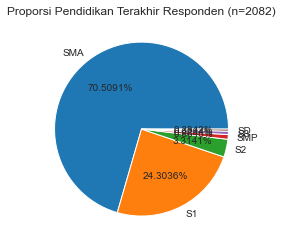

In [13]:
plt.pie(df["Proporsi"], labels = list(df["Pendidikan"]), autopct = "%.4f%%")
plt.title("Proporsi Pendidikan Terakhir Responden (n={})".format(n))
plt.show()

#### Proporsi dan Frekuensi Penghasilan Responden

In [14]:
df = pd.DataFrame(df_bank["penghasilan"].value_counts()).reset_index()
li = []
for i in range(len(df)):
    li.insert(i ,df["penghasilan"][i]/len(df_bank))
df["Proporsi"] = li
df.columns = ["Penghasilan", "Frekuensi", "Proporsi"]

# memebersihkan data yang "tidak menjawab"
found = False
i = 0
while (found == False):
    if df["Penghasilan"][i] == "tidak menjawab":
        found = True
    else:
        i += 1
n = df["Frekuensi"][i]
df = df.drop(labels=[i], axis=0)
n = len(df_bank) - n

for i in range(len(df)):
    df.at[i, "Proporsi"] = df["Frekuensi"][i]/n

Tabel Frekuensi Penghasilan Responden

In [15]:
df

,Penghasilan,Frekuensi,Proporsi
0,< Rp 2 juta,1502,0.732683
1,Rp 2 juta – Rp 5 juta,264,0.128780
2,Rp 5 juta – Rp 10 juta,153,0.074634
3,> Rp 10 juta,131,0.063902


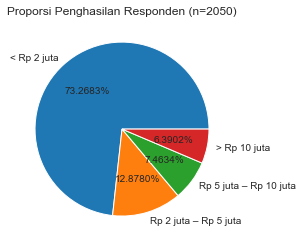

In [16]:
plt.pie(df["Proporsi"], labels = list(df["Penghasilan"]), autopct = "%.4f%%")
plt.title("Proporsi Penghasilan Responden (n={})".format(n))
plt.show()

In [17]:
n = len(df_bank)

### Aktivitas online yang meningkat

In [18]:
a1=0
a2=0
a3=0
a4=0
a5=0
n = len(df_bank)
for i in range(len(df_bank)):
    if pd.isna(df_bank.iloc[i,5]) != True:
        a1 += 1
    if pd.isna(df_bank.iloc[i,6]) != True:
        a2 += 1
    if pd.isna(df_bank.iloc[i,7]) != True:
        a3 += 1
    if pd.isna(df_bank.iloc[i,8]) != True:
        a4 += 1
    if pd.isna(df_bank.iloc[i,9]) != True:
        a5 += 1
li_frek = [a1,a2,a3,a4,a5]
li_prop = [a1/n,a2/n,a3/n,a4/n,a5/n]
li_sub = ["Belanja online", "Streaming video", "Kelas online", "Medsos", "Konsul kesehatan online"]
data = {
    "Aktivitas": li_sub,
    "Frekuensi": li_frek,
    "Proporsi": li_prop
}
df = pd.DataFrame(data)

Tabel Frekuensi dan Proporsi aktivitas online responden yang meningkat

In [19]:
df

,Aktivitas,Frekuensi,Proporsi
0,Belanja online,999,0.476850
1,Streaming video,1445,0.689737
2,Kelas online,1426,0.680668
3,Medsos,1510,0.720764
4,Konsul kesehatan online,100,0.047733


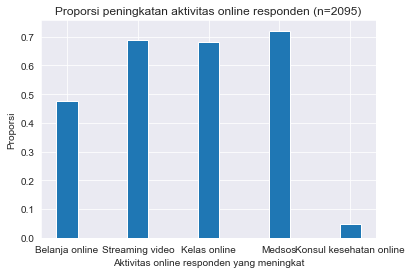

In [20]:
plt.bar(li_sub, li_prop, width = 0.3)
plt.xlabel("Aktivitas online responden yang meningkat")
plt.ylabel("Proporsi")
plt.title("Proporsi peningkatan aktivitas online responden (n={})".format(len(df_bank)))
plt.show()

### Confidence interval proporsi aktivitas online responden yang meningkat

In [21]:
df['z(alpha/2)'] = norm.ppf(0.95)
df['error'] = df['z(alpha/2)']*(df['Proporsi']*(1-df['Proporsi'])/len(df_bank))**(1/2)
df['batas bawah'] = df['Proporsi'] - df['error']
df['batas atas'] = df['Proporsi'] + df['error']
df

,Aktivitas,Frekuensi,Proporsi,z(alpha/2),error,batas bawah,batas atas
0,Belanja online,999,0.476850,1.644854,0.017949,0.458901,0.494799
1,Streaming video,1445,0.689737,1.644854,0.016624,0.673113,0.706362
2,Kelas online,1426,0.680668,1.644854,0.016754,0.663914,0.697422
3,Medsos,1510,0.720764,1.644854,0.016122,0.704642,0.736886
4,Konsul kesehatan online,100,0.047733,1.644854,0.007662,0.040071,0.055394


## Topik 5: Fintech Lending

### Aktivitas Penggunaan Fintech Lending Responden

In [22]:
df_fint.columns

Index(['responden', 'jenis_kelamin', 'usia', 'pendidikan', 'penghasilan',
       'aktivitas_meningkat_1', 'aktivitas_meningkat_2',
       'aktivitas_meningkat_3', 'aktivitas_meningkat_4',
       'aktivitas_meningkat_5', 'menggunakan_fintech_lending?',
       'fintech_pilihan_1', 'fintech_pilihan_2', 'fintech_pilihan_3',
       'fintech_pilihan_4', 'fintech_pilihan_5', 'tujuan_1', 'tujuan_2',
       'tujuan_3', 'tujuan_4', 'tujuan_5', 'nominal_peminjaman', 'keluhan_1',
       'keluhan_2', 'keluhan_3'],
      dtype='object')

#### Proporsi Responden Menggunakan Fintech Lending

In [23]:
n = len(df_fint)
ya = 0
tidak = 0
for i in range(n):
    if df_fint["menggunakan_fintech_lending?"][i] == "ya":
        ya += 1
    elif df_fint["menggunakan_fintech_lending?"][i] == "tidak":
        tidak += 1
li_sub = ["ya", "tidak"]
li_frek = [ya, tidak]
li_prop = [ya/n, tidak/n]
data = {
    "Menggunakan fintech lending?": li_sub,
    "Frekuensi": li_frek,
    "Proporsi": li_prop
}
df = pd.DataFrame(data)

Tabel frekuensi dan proporsi responden menggunakan fintech lending

In [24]:
df

,Menggunakan fintech lending?,Frekuensi,Proporsi
0,ya,123,0.058711
1,tidak,1972,0.941289


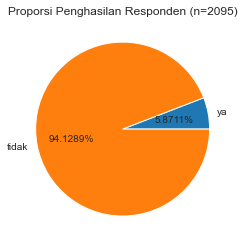

In [25]:
plt.pie(df["Proporsi"], labels = list(df["Menggunakan fintech lending?"]), autopct = "%.4f%%")
plt.title("Proporsi Penghasilan Responden (n={})".format(n))
plt.show()

#### Proporsi Layanan Fintech Lending yang Dipakai

In [26]:
fin1 = 0
fin2 = 0
fin3 = 0
fin4 = 0
fin5 = 0
n = len(df_fint)
for i in range(len(df_fint)):
    if pd.isna(df_fint.iloc[i, 11]) != True:
        fin1 += 1
    elif pd.isna(df_fint.iloc[i, 12]) != True:
        fin2 += 1
    elif pd.isna(df_fint.iloc[i, 13]) != True:
        fin3 += 1
    elif pd.isna(df_fint.iloc[i, 14]) != True:
        fin4 += 1
    elif pd.isna(df_fint.iloc[i, 15]) != True:
        fin5 += 1
li_frek = [fin1,fin2,fin3,fin4,fin5]
li_sub = ["Kredivo", "Danacepat", "Cicil", "Akulaku", "Investree"]
li_prop = [fin1/n,fin2/n,fin3/n,fin4/n,fin5/n]
data = {
    "Fintech": li_sub,
    "Frekuensi": li_frek,
    "Proporsi": li_prop
}
df = pd.DataFrame(data)
df_finlend = df

Tabel Frekuensi Fintech Lending yang Digunakan Responden

In [27]:
df

,Fintech,Frekuensi,Proporsi
0,Kredivo,44,0.021002
1,Danacepat,4,0.001909
2,Cicil,14,0.006683
3,Akulaku,15,0.007160
4,Investree,7,0.003341


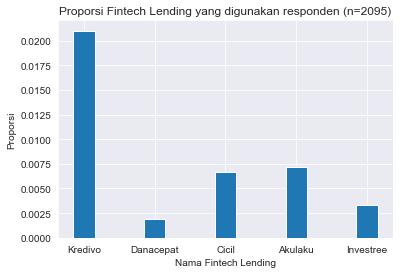

In [28]:
plt.bar(li_sub, li_prop, width = 0.3)
plt.xlabel("Nama Fintech Lending")
plt.ylabel("Proporsi")
plt.title("Proporsi Fintech Lending yang digunakan responden (n={})".format(len(df_fint)))
plt.show()

####  Proporsi Tujuan Menggunakan Fintech Lending Terhadap Jumlah Pengguna Fintech Lending

In [29]:
tuj1 = 0
tuj2 = 0
tuj3 = 0
tuj4 = 0
tuj5 = 0
# n adalah jumlah responden yang menggunakan fintech lending
n = ya
for i in range(len(df_fint)):
    if pd.isna(df_fint.iloc[i, 16]) != True:
        tuj1 += 1
    elif pd.isna(df_fint.iloc[i, 17]) != True:
        tuj2 += 1
    elif pd.isna(df_fint.iloc[i, 18]) != True:
        tuj3 += 1
    elif pd.isna(df_fint.iloc[i, 19]) != True:
        tuj4 += 1
    elif pd.isna(df_fint.iloc[i, 20]) != True:
        tuj5 += 1
li_frek = [tuj1,tuj2,tuj3,tuj4,tuj5]
li_prop = [tuj1/n,tuj2/n,tuj3/n,tuj4/n,tuj5/n]
li_sub = ["Modal Usaha", "Keperluan harian", "Belanja online", "Biaya pendidikan", "Beli kendaraan"]
data = {
    "Tujuan": li_sub,
    "Frekuensi": li_frek,
    "Proporsi": li_prop
}
df = pd.DataFrame(data)
df_lend = df

Tabel Frekuensi Tujuan Pengguna Fintech Lending

In [30]:
df

,Tujuan,Frekuensi,Proporsi
0,Modal Usaha,22,0.178862
1,Keperluan harian,25,0.203252
2,Belanja online,26,0.211382
3,Biaya pendidikan,8,0.065041
4,Beli kendaraan,4,0.032520


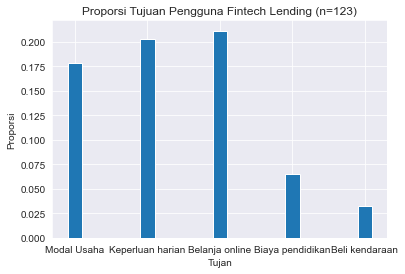

In [31]:
plt.bar(li_sub, li_prop, width = 0.2)
plt.xlabel("Tujan")
plt.ylabel("Proporsi")
plt.title("Proporsi Tujuan Pengguna Fintech Lending (n={})".format(n))
plt.show()

In [32]:
nojawab = 0
for i in range(len(df_fint)):
    if df_fint["nominal_peminjaman"][i] == "tidak menjawab":
        nojawab += 1
        
n = ya - nojawab
df = pd.DataFrame(df_fint["nominal_peminjaman"].value_counts()).reset_index()
li = []
for i in range(len(df)):
    li.insert(i ,df["nominal_peminjaman"][i]/n)
df["Proporsi"] = li
df.columns = ["Nominal", "Frekuensi", "Proporsi"]

# drop yang "tidak menjawab"
df = df.drop(labels=[2], axis=0)

Tabel Frekuensi Nominal Peminjaman

In [33]:
df

,Nominal,Frekuensi,Proporsi
0,"< Rp 1.000.000,-",54,0.504673
1,"Rp 1.000.000 – Rp 5.000.000,-",31,0.289720
3,Rp 5.000.001 – Rp 10.000.000,13,0.121495
4,"> Rp 10.000.000,-",9,0.084112


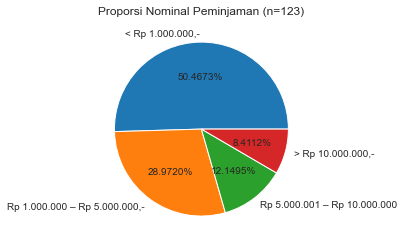

In [34]:
plt.pie(df["Proporsi"], labels = list(df["Nominal"]), autopct = "%.4f%%")
plt.title("Proporsi Nominal Peminjaman (n={})".format(n+nojawab))
plt.show()

In [35]:
kel1 = 0
kel2 = 0
kel3 = 0
# n adalah jumlah responden yang menggunakan fintech lending
n = ya
for i in range(len(df_fint)):
    if pd.isna(df_fint.iloc[i, 22]) != True:
        kel1 += 1
    elif pd.isna(df_fint.iloc[i, 23]) != True:
        kel2 += 1
    elif pd.isna(df_fint.iloc[i, 24]) != True:
        kel3 += 1
li_frek = [kel1,kel2,kel2]
li_prop = [kel1/n,kel2/n,kel3/n]
li_sub = ["Sistem down", "Bunga tinggi", "Masalah debt collector"]

data = {
    "Keluhan": li_sub,
    "Frekuensi": li_frek,
    "Proporsi": li_prop
}
df = pd.DataFrame(data)

Tabel Frekuensi Keluhan Pengguna Fintech Lending

In [36]:
df

,Keluhan,Frekuensi,Proporsi
0,Sistem down,22,0.178862
1,Bunga tinggi,19,0.154472
2,Masalah debt collector,19,0.016260


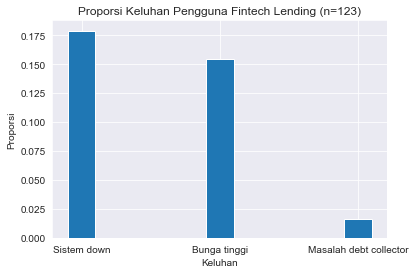

In [37]:
plt.bar(li_sub, li_prop, width = 0.2)
plt.xlabel("Keluhan")
plt.ylabel("Proporsi")
plt.title("Proporsi Keluhan Pengguna Fintech Lending (n={})".format(n))
plt.show()

### Confidence Interval 95% Selisih Proporsi Pengguna Fintech Lending

In [38]:
df_finlend

,Fintech,Frekuensi,Proporsi
0,Kredivo,44,0.021002
1,Danacepat,4,0.001909
2,Cicil,14,0.006683
3,Akulaku,15,0.007160
4,Investree,7,0.003341


Pengguna kredivo - pengguna cicil

In [39]:
n = ya
kred_cicil = df_finlend.at[0,'Proporsi'] - df_finlend.at[2,'Proporsi']
error = norm.ppf(0.95)*(0.2*0.8/n+0.25*0.75/n)**(1/2)
batas_bawah = kred_cicil - error
batas_atas = kred_cicil + error
print('{} < p_kredivo - p_cicil < {}'.format(batas_bawah, batas_atas))

-0.07310850536624756 < p_kredivo - p_cicil < 0.1017481235046724


In [40]:
df_lend

,Tujuan,Frekuensi,Proporsi
0,Modal Usaha,22,0.178862
1,Keperluan harian,25,0.203252
2,Belanja online,26,0.211382
3,Biaya pendidikan,8,0.065041
4,Beli kendaraan,4,0.032520


Tujuan Modal Usaha - Tujuan Belanja Online

In [41]:
modal_belanja = df_lend.at[0,'Proporsi'] - df_lend.at[2,'Proporsi']
error = norm.ppf(0.95)*(0.2*0.8/n+0.25*0.75/n)**(1/2)
batas_bawah = modal_belanja - error
batas_atas = modal_belanja + error
print('{} < p_modal usaha - p_belanja online < {}'.format(batas_bawah, batas_atas))

-0.11994863963871202 < p_modal usaha - p_belanja online < 0.05490798923220794


### INSIGHT

1. Responden laki-laki dan perempuan tidak berbeda jauh jumlahnya
2. Mayoritas responden adalah milenial yang masih berumur di bawah 20 tahun
3. Mayoritas respinden memiliki gaji di bawah 2 juta
4. Kebanyakan responden tidak menggunakan layanan fintech lending
5. Karena responden kebanyakan anak SMA, maka anak SMA mayoritas belum membutuhkan layanan fintech lending
6. Hasil pengolahan data topik fintech lending belum bisa diambil kesimpulan karena jumlah responden yang menggunakan layanan fintech lending sangat sedikit